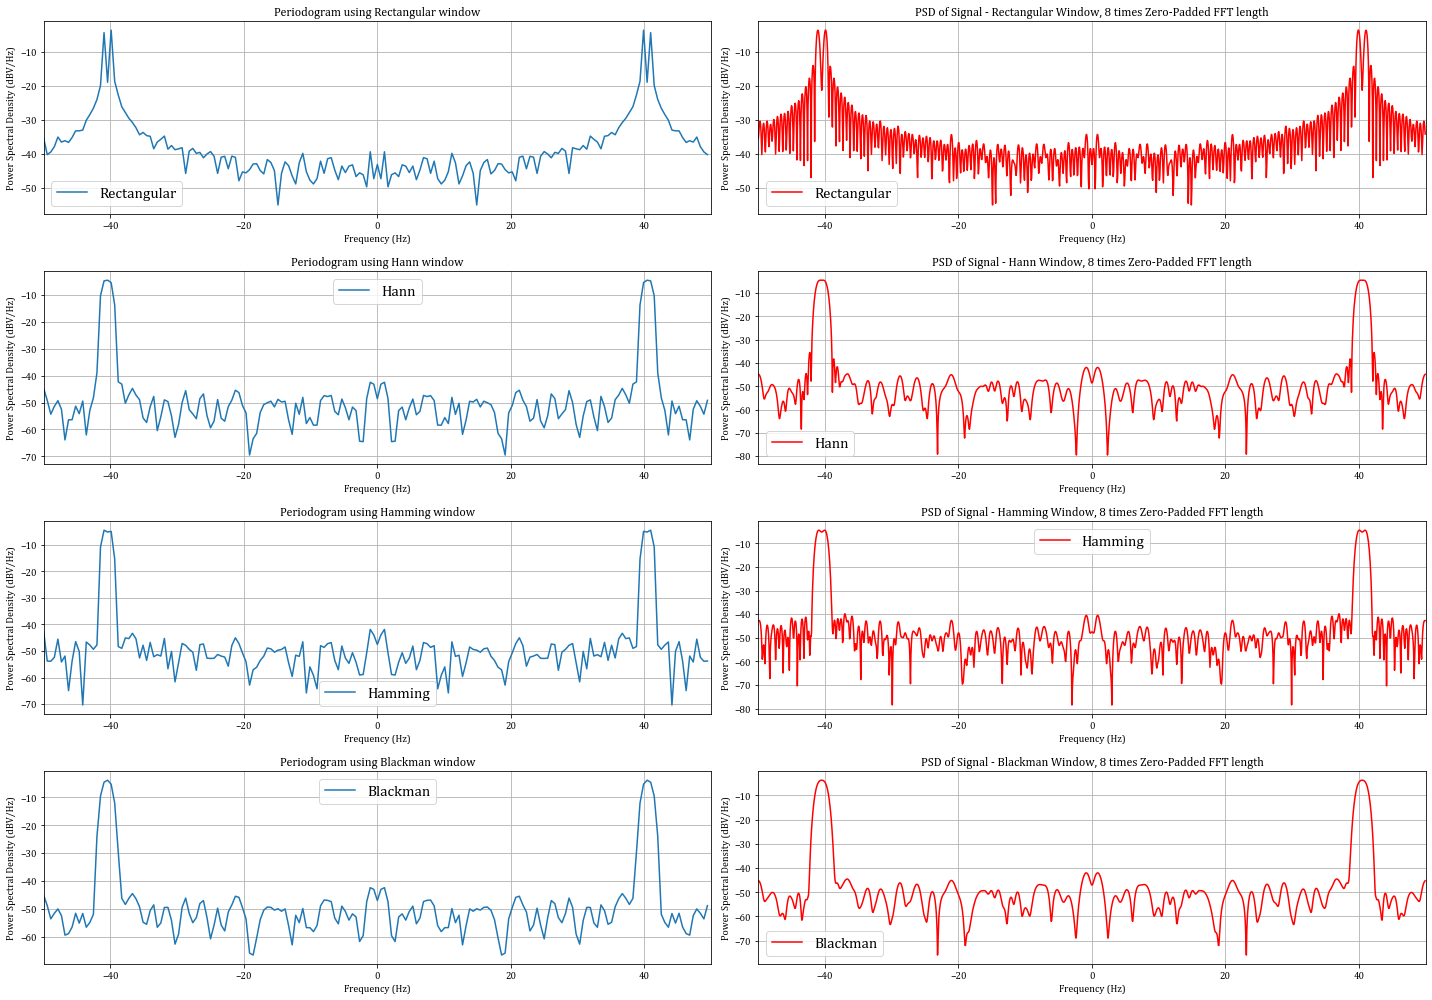

In [1]:
import numpy as np
from scipy.signal.windows import boxcar, hann, hamming, blackman
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Cambria'
plt.rcParams["mathtext.fontset"] = "cm"

# Load the signal
signal = np.load("signal.npy")

# Set the sampling frequency
Fs = 100

def periodogram(x, window, N_fft):
    """
    Compute the periodogram of a signal.

    Parameters
    ----------
    x : array-like
        The input signal.
    window : array-like
        The window function to apply to the signal.
    N_fft : int, optional
        The FFT length. If not specified, it defaults to the length of x.

    Returns
    -------
    Pxx : array-like
        The power spectral density of the signal in decibels.
    """

    if N_fft is None:
        N_fft = len(x)

    X_pad = np.pad(x, (0, N_fft - len(x)), mode='constant')
    X = X_pad * window
   # X = x * window
    Pxx = np.zeros(N_fft)

    for k in range(N_fft):
        X_fft = np.zeros(N_fft, dtype=complex)
        for n in range(N_fft):
            X_fft[k] += X[n] * np.exp(-1j*2*np.pi*k*n/N_fft)
        Pxx[k] = np.abs(X_fft[k])**2 / (np.linalg.norm(window)**2 * Fs)

    Pxx_db = 10*np.log10(Pxx)

    return Pxx_db

def main():
    
    
    # Define the length of the signal and the frequency axis
    # 1. window length == length of input signal == zero-padded FFT length

    N = len(signal)
    freq = np.fft.fftshift(np.fft.fftfreq(N, d=1/Fs))

    #   2. window length == length of input signal < zero-padded FFT length
    #   For this case, your zero-padded FFT should be 8 times longer than 
    #   the window length to sample the PSD at more frequencies

    # Define the zero-padded FFT for 8 times longer
    N_pad = 8 * N
   
    # Create a new frequency axis for the zero-padded FFT for 8 times longer
    freq_pad = np.fft.fftshift(np.fft.fftfreq(N_pad, d=1/Fs))
        
    # Define the window functions
    windows = {
        'Rectangular': boxcar(N),
        'Hann': hann(N),
        'Hamming': hamming(N),
        'Blackman': blackman(N)
}

    # Choose a window function
    window = windows['Rectangular']
  
    # Plot the periodogram for each window function for the original number of frequency points for each window function
    fig, axs = plt.subplots(len(windows), 2, figsize=(20,14))
    for i, (name, window) in enumerate(windows.items()):
        N_fft = N            
        Pxx_db=periodogram(signal, window, N_fft)       
        axs[i, 0].plot(freq, np.fft.fftshift(Pxx_db), label=name)
        axs[i, 0].set_xlabel('Frequency (Hz)')
        axs[i, 0].set_ylabel('Power Spectral Density (dBV/Hz)')
        axs[i, 0].set_title(f'Periodogram using {name} window')
        axs[i, 0].grid()
        axs[i, 0].set_xlim(-Fs/2, Fs/2)
        #axs[i, 0].axhline(y=-50, color='red', linestyle='--')    # plot a horizontal line at -50 dBV/Hz noise floor
        axs[i, 0].legend(fontsize=15)

    # Plot the PSD for the zero-padded number of frequency points 8 times Zero-Padded FFT length
    for i, (name, window) in enumerate(windows.items()):
        N_fft = N_pad
        # Pad the window so that it is the same length as the signal.
        window_padded = np.pad(window, (0, N_fft-len(window)), mode='constant')
        Pxx_db=periodogram(signal, window_padded, N_fft)
        axs[i, 1].plot(freq_pad, np.fft.fftshift(Pxx_db), label=name, color='red')
        axs[i, 1].set_xlabel('Frequency (Hz)')
        axs[i, 1].set_ylabel('Power Spectral Density (dBV/Hz)')
        axs[i, 1].set_title(f'PSD of Signal - {name} Window, 8 times Zero-Padded FFT length')
        axs[i, 1].grid()
        axs[i, 1].set_xlim(-Fs/2, Fs/2)
        #axs[i, 1].axhline(y=-50, color='blue', linestyle='--')    # plot a horizontal line at -50 dBV/Hz noise floor
        axs[i, 1].legend(fontsize=15)

    fig.tight_layout()
    fig.subplots_adjust(hspace=0.3)
    plt.show()


if __name__ == "__main__":
    main()